In [1]:
import os
os.environ['PROJ_LIB'] = '/data/keeling/a/sshu3/anaconda2/share/proj'
from mpl_toolkits.basemap import Basemap, cm, shiftgrid,maskoceans
from netCDF4 import Dataset as NetCDFFile
import numpy as np
import pandas as pd
import numpy.ma as ma
import matplotlib.pyplot as plt
from matplotlib import colors, ticker
import numpy.ma as ma
from scipy.interpolate import griddata
from pyresample import geometry,image, kd_tree
import copy
import isamcalc_lib as isam

In [112]:
## Code to plot the impact from CO2 and climate separately
# Control - noclimate = Climate impact
# Control - noco2 = CO2 effect

# Open site temprature
path='/data/jain1/c/sshu3/SBGC/data/C14/C14processing/examine_soilt/'
fname='boreal_at.txt'
obs_fname=path+fname
data = pd.read_csv(obs_fname,delim_whitespace=True,header=None)
at_boreal = data.values[:,0]
pr_boreal = data.values[:,1]
srad_boreal = data.values[:,2]
lrad_boreal = data.values[:,3]

fname='boreal_st.txt'
obs_fname=path+fname
data = pd.read_csv(obs_fname,delim_whitespace=True,header=None)
st_boreal = data.values[:,5:15]
sw_boreal = data.values[:,0:5]
sw_boreal[sw_boreal<=0] = np.float('nan')

fname='boreal_ice.txt'
obs_fname=path+fname
data = pd.read_csv(obs_fname,delim_whitespace=True,header=None)
ice_boreal = data.values[:,5:15]

fname='boreal_sw.txt'
obs_fname=path+fname
data = pd.read_csv(obs_fname,delim_whitespace=True,header=None)
sm_boreal = data.values[:,5:15]

fname='boreal_energy.txt'
obs_fname=path+fname
data = pd.read_csv(obs_fname,delim_whitespace=True,header=None)
grndf_boreal = data.values[:,8]

fname='tundra_at.txt'
obs_fname=path+fname
data = pd.read_csv(obs_fname,delim_whitespace=True,header=None)
at_tundra = data.values[:,0]
pr_tundra = data.values[:,1]
srad_tundra = data.values[:,2]
lrad_tundra = data.values[:,3]

fname='tundra_st.txt'
obs_fname=path+fname
data = pd.read_csv(obs_fname,delim_whitespace=True,header=None)
st_tundra = data.values[:,5:15]
sw_tundra = data.values[:,0:5]
sw_tundra[sw_tundra<=0] = np.float('nan')

fname='tundra_ice.txt'
obs_fname=path+fname
data = pd.read_csv(obs_fname,delim_whitespace=True,header=None)
ice_tundra = data.values[:,5:15]

fname='tundra_sw.txt'
obs_fname=path+fname
data = pd.read_csv(obs_fname,delim_whitespace=True,header=None)
sm_tundra = data.values[:,5:15]

fname='tundra_energy.txt'
obs_fname=path+fname
data = pd.read_csv(obs_fname,delim_whitespace=True,header=None)
grndf_tundra = data.values[:,8]


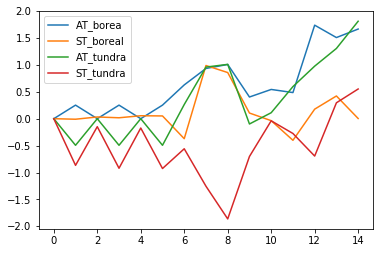

In [113]:
# Calculate the mean of every 10 years
at_boreal_series = np.zeros((15))
at_tundra_series = np.zeros((15))
st_boreal_series = np.zeros((15))
st_tundra_series = np.zeros((15))
ice_boreal_series = np.zeros((15))
ice_tundra_series = np.zeros((15))
sm_boreal_series = np.zeros((15))
sm_tundra_series = np.zeros((15))
for t in np.arange(0,15):
    at_boreal_series[t] = np.mean(at_boreal[(t*3650):(t*3650+3650)])
    at_tundra_series[t] = np.mean(at_tundra[(t*3650):(t*3650+3650)])
    st_boreal_series[t] = np.mean(st_boreal[(t*3650):(t*3650+3650),0])
    st_tundra_series[t] = np.mean(st_tundra[(t*3650):(t*3650+3650),0])
    ice_boreal_series[t] = np.mean(ice_boreal[(t*3650):(t*3650+3650),0])
    ice_tundra_series[t] = np.mean(ice_tundra[(t*3650):(t*3650+3650),0])
    sm_boreal_series[t] = np.mean(sm_boreal[(t*3650):(t*3650+3650),0])
    sm_tundra_series[t] = np.mean(sm_tundra[(t*3650):(t*3650+3650),0])


In [110]:
# Calculate the mean of every years
at_boreal_series = np.zeros((150))
at_tundra_series = np.zeros((150))
st_boreal_series = np.zeros((150))
st_tundra_series = np.zeros((150))
for t in np.arange(0,150):
#     at_boreal_series[t] = np.mean(at_boreal[(t*365):(t*365+365)])
#     at_tundra_series[t] = np.mean(at_tundra[(t*365):(t*365+365)])
#     st_boreal_series[t] = np.mean(st_boreal[(t*365):(t*365+365),0])
#     st_tundra_series[t] = np.mean(st_tundra[(t*365):(t*365+365),0])
    # Summer only
    at_boreal_series[t] = np.mean(at_boreal[(t*365+150):(t*365+220)])
    at_tundra_series[t] = np.mean(at_tundra[(t*365+150):(t*365+220)])
    st_boreal_series[t] = np.mean(st_boreal[(t*365+150):(t*365+220),0])
    st_tundra_series[t] = np.mean(st_tundra[(t*365+150):(t*365+220),0])
    
# Get every 10 years for summer
at_boreal_decade = np.zeros((15))
at_tundra_decade = np.zeros((15))
st_boreal_decade = np.zeros((15))
st_tundra_decade = np.zeros((15))
for t in np.arange(0,15):
    # Summer only
    at_boreal_decade[t] = np.mean(at_boreal_series[(t*10):(t*10+10)])
    at_tundra_decade[t] = np.mean(at_tundra_series[(t*10):(t*10+10)])
    st_boreal_decade[t] = np.mean(st_boreal_series[(t*10):(t*10+10)])
    st_tundra_decade[t] = np.mean(st_tundra_series[(t*10):(t*10+10)])

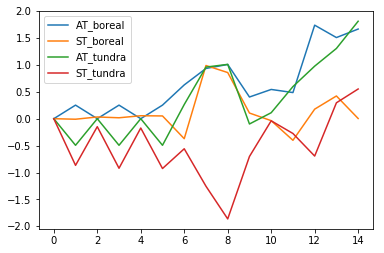

In [114]:
plt.plot(at_boreal_series - at_boreal_series[0])
plt.plot(st_boreal_series - st_boreal_series[0])
plt.plot(at_tundra_series - at_tundra_series[0])
plt.plot(st_tundra_series - st_tundra_series[0])
plt.legend(['AT_boreal', 'ST_boreal', 'AT_tundra', 'ST_tundra'])

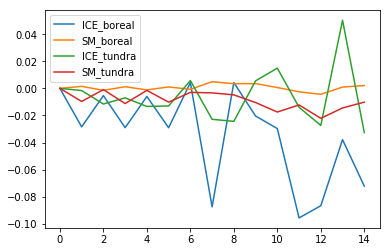

In [19]:
plt.plot(ice_boreal_series - ice_boreal_series[0])
plt.plot(sm_boreal_series - sm_boreal_series[0])
plt.plot(ice_tundra_series - ice_tundra_series[0])
plt.plot(sm_tundra_series - sm_tundra_series[0])
plt.legend(['ICE_boreal', 'SM_boreal', 'ICE_tundra', 'SM_tundra'])

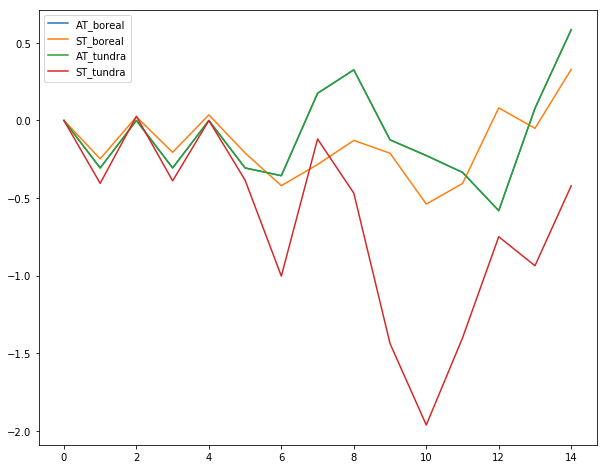

In [111]:
# Decadal plot
plt.figure(figsize=(10,8))
#plt.ylim([-1.5,1.5])
plt.plot(at_boreal_decade - at_boreal_decade[0])
plt.plot(st_boreal_decade - st_boreal_decade[0])
plt.plot(at_tundra_decade - at_tundra_decade[0])
plt.plot(st_tundra_decade - st_tundra_decade[0])
plt.legend(['AT_boreal', 'ST_boreal', 'AT_tundra', 'ST_tundra'])

In [184]:
# Calculate the mean of every 10 years
at_boreal_series = at_boreal[(80*365):(80*365+365)]
at_tundra_series = at_tundra[(80*365):(80*365+365)]
st_boreal_series = st_boreal[(80*365):(80*365+365),0]
st_tundra_series = st_tundra[(80*365):(80*365+365),0]


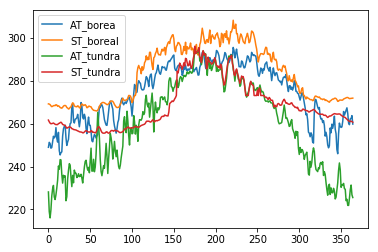

In [185]:
# Check the seasonality
plt.plot(at_boreal_series)
plt.plot(st_boreal_series)
plt.plot(at_tundra_series)
plt.plot(st_tundra_series)
plt.legend(['AT_borea', 'ST_boreal', 'AT_tundra', 'ST_tundra'])
    

In [186]:
at_1861_mean = np.mean(at_tundra[(0*365):(0*365+365)])
at_1941_mean = np.mean(at_tundra[(78*365):(78*365+365)])
st_1861_mean = np.mean(st_tundra[(0*365):(0*365+365),0])
st_1941_mean = np.mean(st_tundra[(78*365):(78*365+365),0])
print('at_1861_mean')
print(at_1861_mean)
print('at_1941_mean')
print(at_1941_mean)
print('st_1861_mean')
print(st_1861_mean)
print('st_1941_mean')
print(st_1941_mean)

at_1861_mean
259.2350426739726
at_1941_mean
261.0667105589041
st_1861_mean
268.7621636547945
st_1941_mean
270.3149853452055


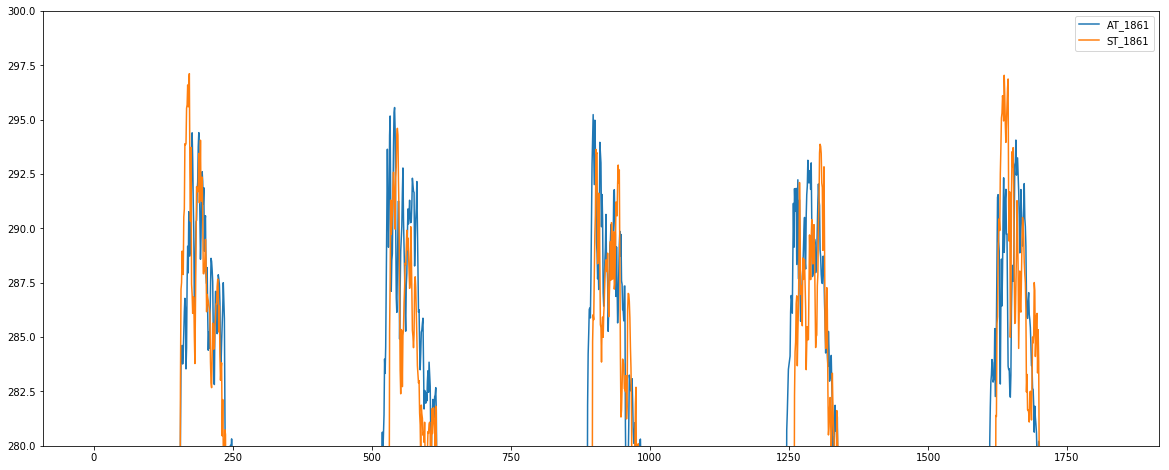

In [187]:
# Tundra
plt.figure(figsize=(20,8))
# Calculate the mean of every 10 years
at_boreal_series = at_tundra[(0*365):(0*365+5*365)]
at_tundra_series = at_tundra[(100*365):(100*365+5*365)]
st_boreal_series = st_tundra[(0*365):(0*365+5*365),0]
st_tundra_series = st_tundra[(100*365):(100*365+5*365),0]
# Check the seasonality
plt.ylim([280,300])
#plt.plot(at_boreal_series)
plt.plot(st_boreal_series)
#plt.plot(at_tundra_series)
plt.plot(st_tundra_series)
plt.legend(['AT_1861', 'ST_1861', 'AT_1941', 'ST_1941'])


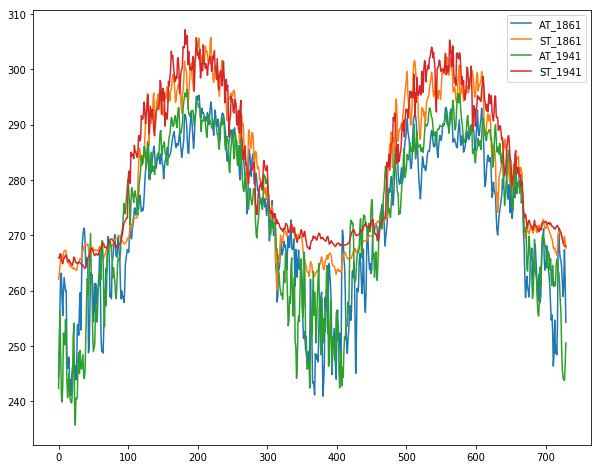

In [107]:
plt.figure(figsize=(10,8))
# Calculate the mean of every 10 years
at_boreal_series = at_boreal[(0*365):(0*365+2*365)]
at_tundra_series = at_boreal[(77*365):(77*365+2*365)]
st_boreal_series = st_boreal[(0*365):(0*365+2*365),0]
st_tundra_series = st_boreal[(77*365):(77*365+2*365),0]
# Check the seasonality
plt.plot(at_boreal_series)
plt.plot(st_boreal_series)
plt.plot(at_tundra_series)
plt.plot(st_tundra_series)
plt.legend(['AT_1861', 'ST_1861', 'AT_1941', 'ST_1941'])


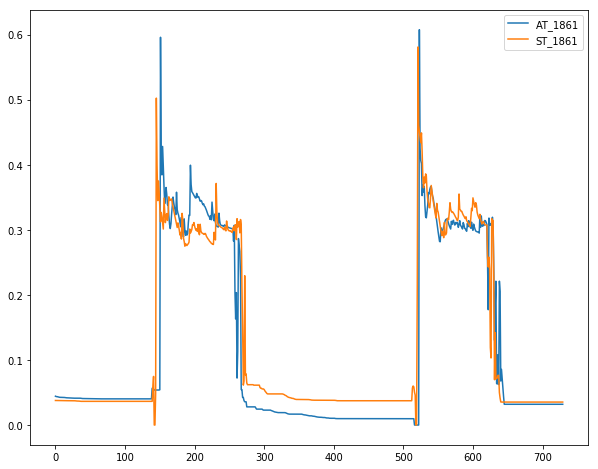

In [27]:
plt.figure(figsize=(10,8))
# Calculate the mean of every 10 years
ice_boreal_series = ice_boreal[(0*365):(0*365+2*365),0]
ice_tundra_series = ice_boreal[(77*365):(77*365+2*365),0]
sm_boreal_series = sm_boreal[(0*365):(0*365+2*365),0]
sm_tundra_series = sm_boreal[(77*365):(77*365+2*365),0]
# Check the seasonality
#plt.plot(ice_boreal_series)
#plt.plot(ice_tundra_series)
plt.plot(sm_boreal_series)
plt.plot(sm_tundra_series)
plt.legend(['AT_1861', 'ST_1861', 'AT_1941', 'ST_1941'])


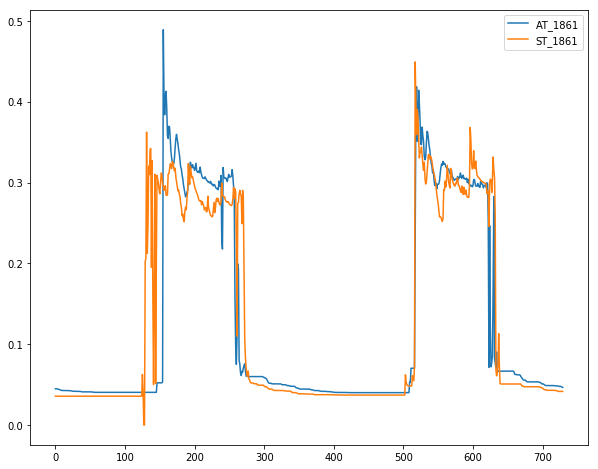

In [28]:
plt.figure(figsize=(10,8))
# Calculate the mean of every 10 years
ice_boreal_series = ice_tundra[(0*365):(0*365+2*365),0]
ice_tundra_series = ice_tundra[(77*365):(77*365+2*365),0]
sm_boreal_series = sm_tundra[(0*365):(0*365+2*365),0]
sm_tundra_series = sm_tundra[(77*365):(77*365+2*365),0]
# Check the seasonality
#plt.plot(ice_boreal_series)
#plt.plot(ice_tundra_series)
plt.plot(sm_boreal_series)
plt.plot(sm_tundra_series)
plt.legend(['AT_1861', 'ST_1861', 'AT_1941', 'ST_1941'])

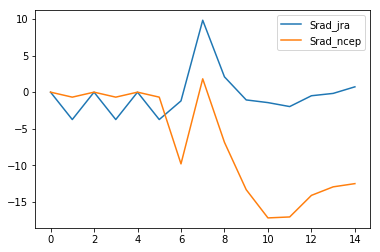

In [115]:
# Check Precipitation during summer only
# Calculate the mean of every 10 years
pr_boreal_series = np.zeros((150))
pr_tundra_series = np.zeros((150))
srad_boreal_series = np.zeros((150))
srad_tundra_series = np.zeros((150))
lrad_boreal_series = np.zeros((150))
lrad_tundra_series = np.zeros((150))
for t in np.arange(0,150):
    pr_boreal_series[t] = np.mean(pr_boreal[(t*365+150):(t*365+250)])
    pr_tundra_series[t] = np.mean(pr_tundra[(t*365+150):(t*365+250)])
    srad_boreal_series[t] = np.mean(srad_boreal[(t*365+150):(t*365+250)])
    srad_tundra_series[t] = np.mean(srad_tundra[(t*365+150):(t*365+250)])
    lrad_boreal_series[t] = np.mean(lrad_boreal[(t*365+150):(t*365+250)])
    lrad_tundra_series[t] = np.mean(lrad_tundra[(t*365+150):(t*365+250)])

# Calculate decadal mean
pr_boreal_decade = np.zeros((15))
pr_tundra_decade = np.zeros((15))
srad_boreal_decade = np.zeros((15))
srad_tundra_decade = np.zeros((15))
lrad_boreal_decade = np.zeros((15))
lrad_tundra_decade = np.zeros((15))
for t in np.arange(0,15):
    pr_boreal_decade[t] = np.mean(pr_boreal_series[(t*10):(t*10+10)])
    pr_tundra_decade[t] = np.mean(pr_tundra_series[(t*10):(t*10+10)])
    srad_boreal_decade[t] = np.mean(srad_boreal_series[(t*10):(t*10+10)])
    srad_tundra_decade[t] = np.mean(srad_tundra_series[(t*10):(t*10+10)])
    lrad_boreal_decade[t] = np.mean(lrad_boreal_series[(t*10):(t*10+10)])
    lrad_tundra_decade[t] = np.mean(lrad_tundra_series[(t*10):(t*10+10)])

#plt.plot(pr_boreal_decade)# - pr_boreal_decade[0])
#plt.plot(srad_boreal_decade)# - srad_boreal_decade[0])
plt.plot(lrad_boreal_decade - lrad_boreal_decade[0])
#plt.plot(pr_tundra_decade)# - pr_tundra_decade[0])
#plt.plot(srad_tundra_decade)# - srad_tundra_decade[0])
plt.plot(lrad_tundra_decade - lrad_tundra_decade[0])
plt.legend(['Srad_boreal', 'Srad_tundra'])

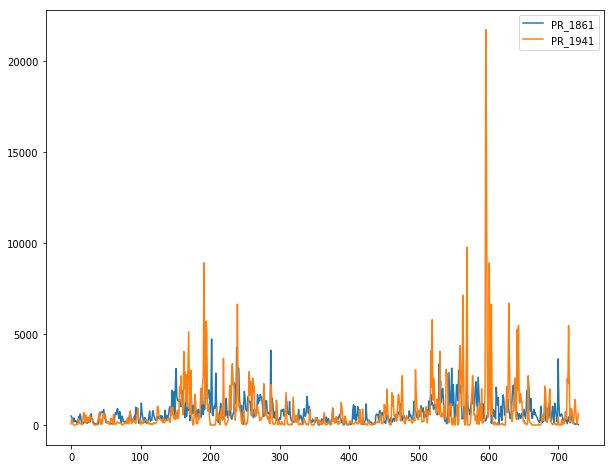

In [122]:
# Check tundra precipitation
# Tundra
plt.figure(figsize=(10,8))
# Calculate the mean of every 10 years
pr_tundra_1861 = pr_tundra[(0*365):(0*365+2*365)]
pr_tundra_1941 = pr_tundra[(77*365):(77*365+2*365)]
#st_boreal_series = st_tundra[(0*365):(0*365+2*365),0]
#st_tundra_series = st_tundra[(77*365):(77*365+2*365),0]
# Check the seasonality
plt.plot(pr_tundra_1861)
plt.plot(pr_tundra_1941)
#plt.plot(at_tundra_series)
#plt.plot(st_tundra_series)
plt.legend(['PR_1861', 'PR_1941'])

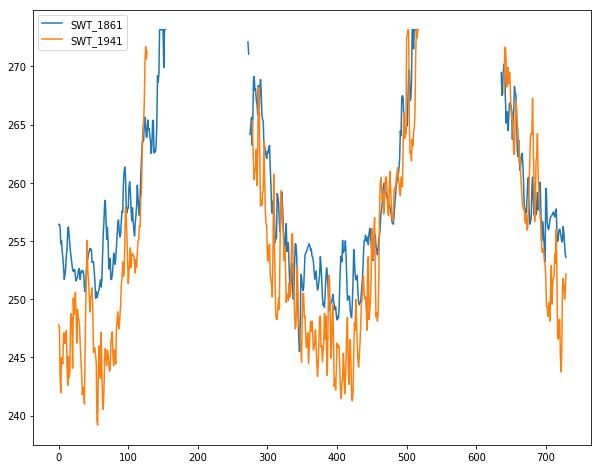

In [160]:
# Check tundra snow temperature
plt.figure(figsize=(10,8))
# Calculate the mean of every 10 years
sw_tundra_1861 = sw_tundra[(0*365):(0*365+2*365),4]
sw_tundra_1941 = sw_tundra[(77*365):(77*365+2*365),4]
# Check the seasonality
plt.plot(sw_tundra_1861)
plt.plot(sw_tundra_1941)
#plt.plot(at_tundra_series)
#plt.plot(st_tundra_series)
plt.legend(['SWT_1861', 'SWT_1941'])


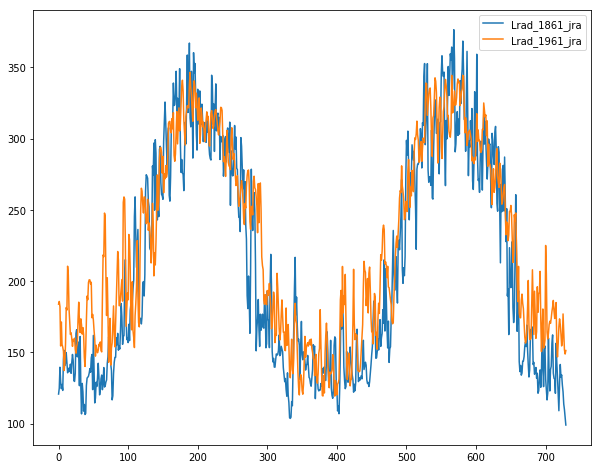

In [98]:
# Check tundra lwrad
plt.figure(figsize=(10,8))
# Calculate the mean of every 10 years
lrad_boreal_1861 = lrad_boreal[(0*365):(0*365+2*365)]
lrad_boreal_1941 = lrad_boreal[(100*365):(100*365+2*365)]
lrad_tundra_1861 = lrad_tundra[(0*365):(0*365+2*365)]
lrad_tundra_1941 = lrad_tundra[(100*365):(100*365+2*365)]
# Check the seasonality
plt.plot(lrad_boreal_1861)
#plt.plot(lrad_boreal_1941)
plt.plot(lrad_tundra_1861)
#plt.plot(lrad_tundra_1941)
plt.legend(['Lrad_1861_jra', 'Lrad_1961_jra', 'Lrad_1861_ncep', 'Lrad_1961_ncep'])

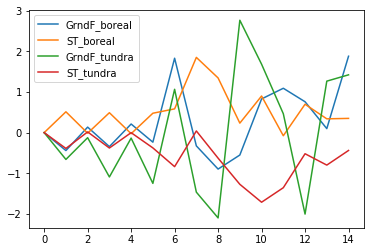

In [222]:
# Check the ground heat flux (summer only)
# Calculate the mean of every 10 years
grndf_boreal_series = np.zeros((150))
grndf_tundra_series = np.zeros((150))
st_boreal_series = np.zeros((150))
st_tundra_series = np.zeros((150))
for t in np.arange(0,150):
    grndf_boreal_series[t] = np.mean(grndf_boreal[(t*365+150):(t*365+250)])
    grndf_tundra_series[t] = np.mean(grndf_tundra[(t*365+150):(t*365+250)])
    st_boreal_series[t] = np.mean(st_boreal[(t*365+150):(t*365+250),0])
    st_tundra_series[t] = np.mean(st_tundra[(t*365+150):(t*365+250),0])

# Calculate decadal mean
grndf_boreal_decade = np.zeros((15))
grndf_tundra_decade = np.zeros((15))
st_boreal_decade = np.zeros((15))
st_tundra_decade = np.zeros((15))
for t in np.arange(0,15):
    grndf_boreal_decade[t] = np.mean(grndf_boreal_series[(t*10):(t*10+10)])
    grndf_tundra_decade[t] = np.mean(grndf_tundra_series[(t*10):(t*10+10)])
    st_boreal_decade[t] = np.mean(st_boreal_series[(t*10):(t*10+10)])
    st_tundra_decade[t] = np.mean(st_tundra_series[(t*10):(t*10+10)])

plt.plot(grndf_boreal_decade - grndf_boreal_decade[0])
plt.plot(st_boreal_decade - st_boreal_decade[0])
plt.plot(grndf_tundra_decade - grndf_tundra_decade[0])
plt.plot(st_tundra_decade - st_tundra_decade[0])
plt.legend(['GrndF_boreal', 'ST_boreal', 'GrndF_tundra', 'ST_tundra'])

In [224]:
st_tundra_decade

array([286.64708104, 286.25814852, 286.66480714, 286.26860542,
       286.64575179, 286.27128636, 285.8102441 , 286.68794462,
       286.01935073, 285.37590481, 284.93484807, 285.29214581,
       286.12774217, 285.84834829, 286.20822356])

In [225]:
at_tundra_decade

array([284.40192477, 284.13550569, 284.40192477, 284.13550569,
       284.40192477, 284.13550569, 284.19765519, 284.60561878,
       284.48501445, 284.2175661 , 284.13628984, 284.06364532,
       284.21962083, 284.5689452 , 284.91346252])

In [ ]:
lonnc2

In [ ]:
lonnc2 % 360
